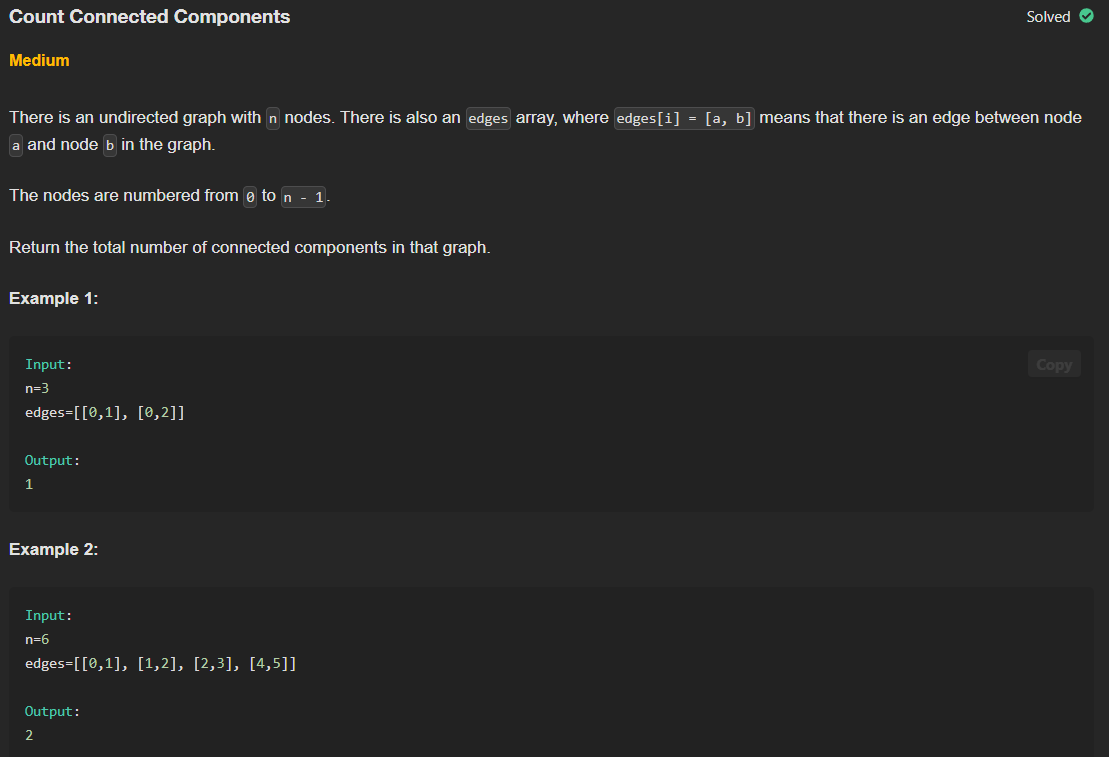

In [ ]:
# Solution 1
# DFS
from collections import defaultdict
class Solution:
    def countComponents(self, n: int, edges: List[List[int]]) -> int:
        adjMap = defaultdict(list)
        for v0, v1 in edges:
            adjMap[v0].append(v1)
            adjMap[v1].append(v0)
 

        seen = set()
        len_seen = 0
        connected_component = 0

        def dfs(node):
            nonlocal seen

            seen.add(node)
            for next_vertex in adjMap[node]:
                if next_vertex not in seen:
                    dfs(next_vertex)

        for node in range(n):
            if node not in seen:
                dfs(node)
                if len_seen != len(seen):
                    connected_component += 1
        return connected_component

In [ ]:
# Solution 2
# UnionFind Algorithm
class Solution:
    def __initialize__(self):
        self.parentList = [i for i in range(100)]

    def find(self, node):
        parent = self.parentList[node]
        if parent != node:
            self.parentList[node] = self.find(parent)
        return self.parentList[node]
    
    def union(self, node1, node2):
        self.parentList[self.find(node2)] = self.find(node1)

    def countComponents(self, n: int, edges: List[List[int]]) -> int:
        self.__initialize__()
        unique_components = set()
        for edge in edges:
            self.union(*edge)

        for i in range(n):
            unique_components.add(self.find(i))
        return len(unique_components)